# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os
from datetime import datetime
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import r2_score

In [2]:
data_df = pd.read_csv(f'Worldometer-data-preprocessed/table_18-04-2022_preprocessed.csv')
data_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,118.8782


In [3]:
week_df = pd.read_csv(f'Worldometer-data-preprocessed/data_1_week.csv')
week_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,day,Density
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,18-04-2022,149.2199
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,18-04-2022,36.0000
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,18-04-2022,427.8611
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,18-04-2022,25.2888
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,18-04-2022,118.8782


- Coi thử mỗi lục địa có bao nhiêu nước

In [106]:
data_df.groupby('continent').size()

continent
Africa               58
Asia                 49
Australia/Oceania    18
Europe               48
North America        39
South America        14
dtype: int64

# Trực quan các mối quan hệ giữa các trường dữ liệu

## 1. Một trường đơn

### a) Total Cases

- Ta sẽ gom nhóm theo 6 châu lục, mỗi châu lục sẽ tính tổng `Total Cases`. Vì vậy ta chọn biểu đồ bar chart để so sánh `Total Cases` giữa các châu

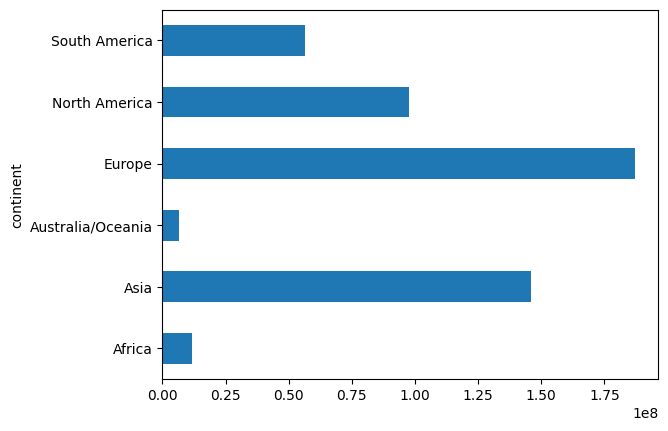

In [103]:
tcdf = data_df.groupby('continent')[['Total Cases', 'Population']].sum()
# tcdf['Total Cases'] = tcdf['Total Cases']/tcdf['Population']
tcdf['Total Cases'].plot.barh();

Nhận xét: tổng số ca nhiễm ở châu Âu và châu Á là nhiều nhất so với các châu lục còn lại. Điều này khá dễ hiểu vì châu Á có Trung Quốc là nơi đầu tiên bùng phát dịch bệnh; còn châu Âu thì đa phần người dân không đeo khẩu trang 

### b) Total Deaths

- Đầu tiên, ta gom nhóm theo 2 thuộc tính `continent` & `day`, sau đó lấy tổng trên thuộc tính `Total Deaths` để cho biết với mỗi châu lục vào mỗi ngày từ 18-25/4/2022 thì tổng số người chết là bao nhiêu

In [5]:
df = week_df.groupby(['continent', 'day'])[['Total Deaths']].sum()
df = df.reset_index()
df.head()

,continent,day,Total Deaths
0,Africa,18-04-2022,253519.0
1,Africa,19-04-2022,253559.0
2,Africa,20-04-2022,253596.0
3,Africa,21-04-2022,253667.0
4,Africa,22-04-2022,253681.0


- Vì tính chất dữ liệu theo thời gian nên ta dùng biểu đồ line chart để thể hiện sự thay đổi tổng số người chết - `Total Deaths` trong 1 tuần từ 18-25/4/2022
- Biểu đồ đầu tiên là biểu đồ tổng quát về sự biến thiên `Total Deaths` cho cả 6 châu lục 
- 6 biểu đồ còn lại là chi tiết biến thiên `Total Deaths` của từng châu lục

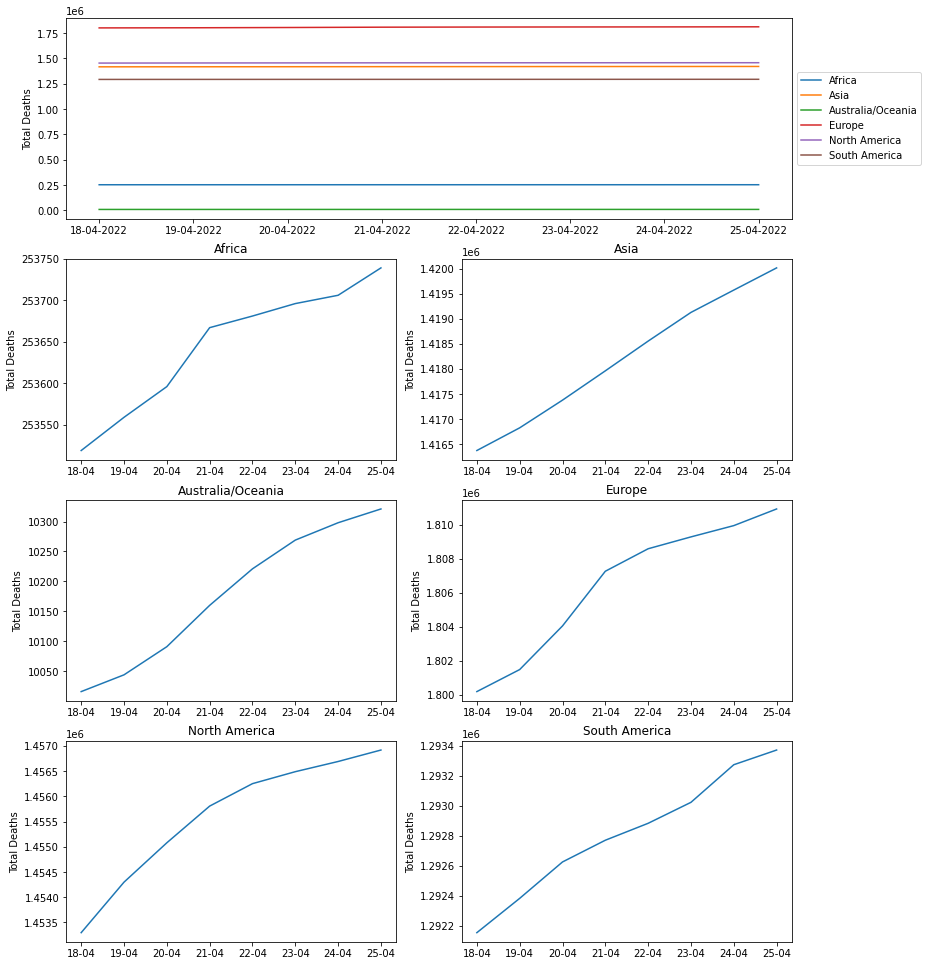

In [6]:
plt.figure(figsize=(13, 17))

ax = plt.subplot(4,2,(1,2))
sns.lineplot(data=df, x='day', y='Total Deaths', hue='continent', ax=ax);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax.set_xlabel('')

for i, continent in enumerate(df['continent'].unique(), 3):
    continent_df = df.loc[df['continent'] == continent, 'Total Deaths']
    ax = plt.subplot(4,2,i)

    continent_df = df.loc[df['continent'] == continent, ['day', 'Total Deaths']].set_index('day')
    continent_df.plot.line(ax=ax, legend=None, title=continent, ylabel='Total Deaths', xlabel='')
    # rút gọn xtick từ dd-mm-yyy về dd-mm
    xticks = ax.get_xticks() # [-1, 0, 1,...]
    trunc_labels = [d[0:5] for d in continent_df.index]
    # thay đổi xticks labels
    ax.set_xticks(xticks[1:-1])
    ax.set_xticklabels(trunc_labels)

Nhận xét: 
- Với biểu đồ đầu tiên: Nhận thấy rằng 1 tuần vừa qua, số người chết hầu như không đổi ở 6 châu lục, ta sẽ xét cụ thể từng châu lục trong các biểu đồ dưới. Ngoài ra, dễ thấy tổng số ca chết tập trung cao ở 4 châu (giảm dần): Europe, North America, Asia và South America và tập trung thấp ở 2 châu còn lại: Africa & Australia/Oceania
- Qua các biểu đồ còn lại, thấy rằng thuộc tính `Total Deaths` có xu hướng tăng qua từng ngày bất kể châu lục nào, ví dụ Africa số ca chết tăng 200 người so với đầu tuần, Asia tăng khoảng 10000 ca chết so với đầu tuần, ...

### c) New Cases, New Deaths, New Recovered
- Ta sẽ xem xét riêng lẻ 3 cột này trong 1 tuần, từ 18/4/2022 - 25/4/2022

In [7]:
# data 18-04
df = data_df.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df['day'] = 18

# data 25-04
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df_25 = df_25.groupby('continent')[['New Cases', 'New Deaths', 'New Recovered']].sum().reset_index()
df_25['day'] = 25

df = pd.concat([df, df_25], axis=0)
df.head()

,continent,New Cases,New Deaths,New Recovered,day
0,Africa,1139.0,39.0,820.0,18
1,Asia,147568.0,490.0,128362.0,18
2,Australia/Oceania,40610.0,19.0,56266.0,18
3,Europe,120322.0,693.0,730283.0,18
4,North America,35540.0,143.0,49775.0,18


#### Góc nhìn từ slope graph: 
Ta mong muốn có 1 cái nhìn trực tiếp về tốc độ phát sinh các ca nhiễm mới (`New Deaths`)/ ca chết mới (`New Deaths`)/ ca hồi phục mới (`New Recovered`) theo thời gian. Đây là 1 thể loại con của line graph 

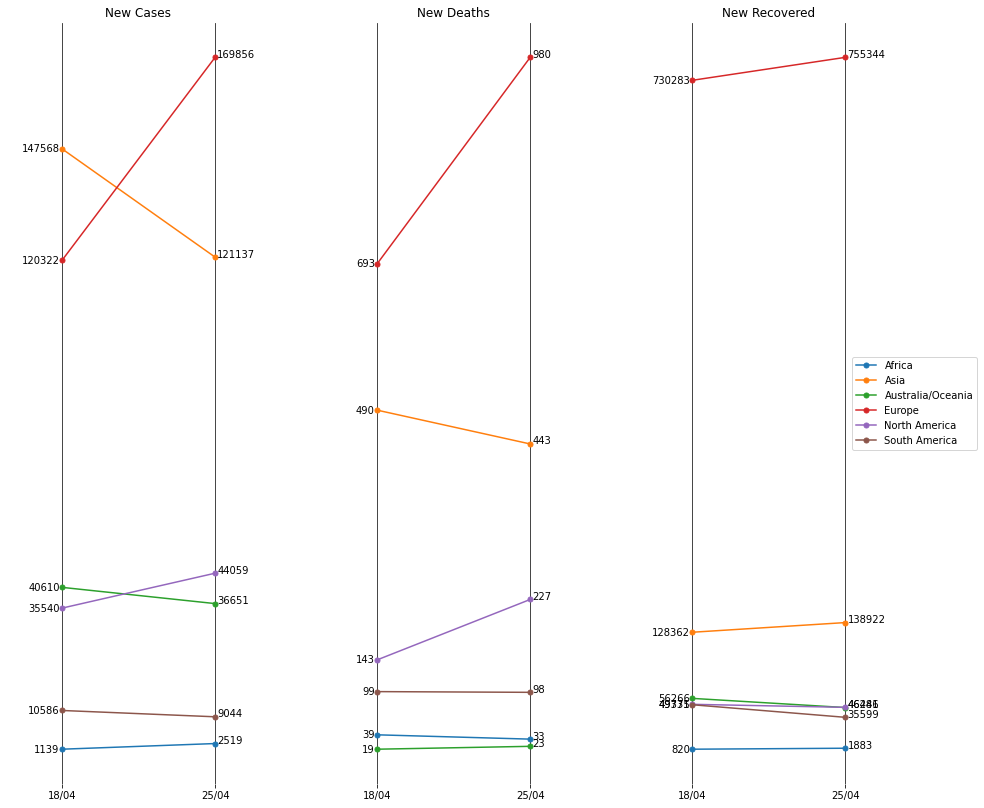

In [8]:
cols = ['New Cases', 'New Deaths', 'New Recovered']
continents = df['continent'].unique()
plt.figure(figsize=(16, 14))

for i, col in enumerate(cols, 1):
    ax = plt.subplot(1,3,i)
    for continent in continents:
        temp = df[df['continent'] == continent]
        plt.plot(temp['day'], temp[col], marker='o', markersize=5)
        plt.text(temp['day'].values[1]+0.1, temp[col].values[1], int(temp[col].values[1]))
        plt.text(temp['day'].values[0]-0.1, temp[col].values[0], int(temp[col].values[0]), va='center', ha='right')

    # x limits, x ticks
    plt.xlim(15.5, 27.5)
    plt.xticks([18, 25], ['18/04', '25/04'])

    # get y ticks, replace 1,000 with k, and draw the ticks
    yticks = plt.yticks()[0]
    plt.yticks([])

    # title
    plt.title(col)

    # grid
    ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)

    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if i==3:
        plt.legend(continents, loc='center left', bbox_to_anchor=(0.8, 0.5));

Nhận xét: 
- `New Cases`: thuộc tính này có tốc độ thay đổi diễn ra mạnh hơn 2 thuộc tính còn lại. Europe trong 1 tuần tăng khoảng 49000 ca nhiễm mới, tốc độ lây lan nhanh nhất so với các châu còn lại, kế tiếp là North America. Asia và Australia/Ocenia là 2 châu lục giảm mạnh trong tuần, tuy vậy nhưng Asia vẫn xếp thứ 2 về số lượng lượng ca nhiễm mới. Còn Africa và South America lần lượt tăng và giảm 1 lượng không nhiều 
- `New Deaths`: tương tự thì Europe và Asia lần lượt là 2 châu lục tăng và giảm nhanh so với các châu còn lại, nhưng vẫn xếp hạng có `New Deaths` cao. North America tăng hơn 100 ca chết trong 1 tuần. Các châu lục còn lại chết dưới 10 người trong tuần qua
- `New Recovered`: thuộc tính này nhìn chung tốc độ tăng rất chậm, đôi khi là giảm. Dễ thấy tuy Europe có số ca nhiễm & ca chết tăng mạnh, nhưng tốc độ hồi phục cũng rất nhanh

#### Góc nhìn từ area plot:
Slope graph cho ta biết về tốc độ thay đổi của 3 cột `New Cases`, `New Deaths`, `New Recovered`. Ngoài ra ta còn muốn biết sự thay đổi này đáng kể hay không đáng kể so với tổng thể chung, chính vì vậy mà area chart được dùng

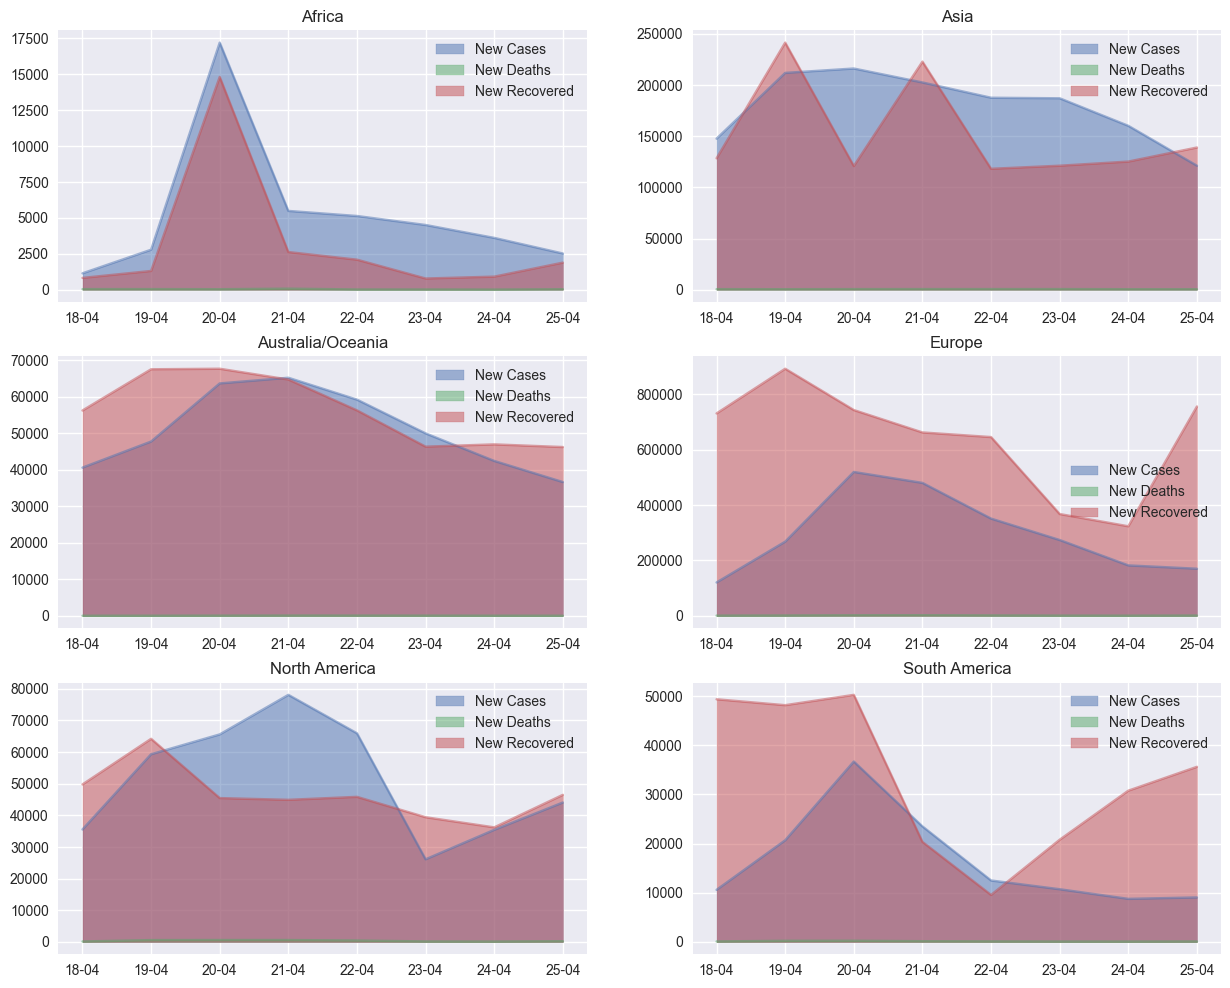

In [128]:
plt.style.use('seaborn')
df = week_df.groupby(['continent', 'day'])[['New Cases', 'New Deaths', 'New Recovered']].agg(sum).reset_index()

for i, continent in enumerate(df['continent'].unique(), 1):
    ax = plt.subplot(3,2,i)
    df_continent = df[df['continent'] == continent].drop(columns=['continent'])
    df_continent['day'] = df_continent['day'].apply(lambda x: x[:5])
    df_continent.set_index('day', inplace=True)
    df_continent.plot.area(stacked=False, ax=ax, figsize=(15,12), title=continent, xlabel='');

Nhận xét: 
- Tổng số người chết - `New Deaths` trên cả thể giới (6 châu lục) thay đổi rất nhỏ so với lượng `New Cases` & `New Recovered`
- Chiếm phần nhiều nhất hầu như là `New Recovered`, tuy tốc độ hồi phục theo như slope graph là chậm, nhưng số lượng người hồi phục thì rất nhiều, và nhiều hơn `New Cases`
- 1 điểm nhỏ nổi bật ở Asia: ngày 19 và 21/4/2022 là 2 ngày châu Á đạt 2 đỉnh

### d) Active Cases

- Ta so sánh `Active Cases` của mỗi châu lục thay đổi thế nào sau 1 tuần, vì vậy nên pie chart được dùng  

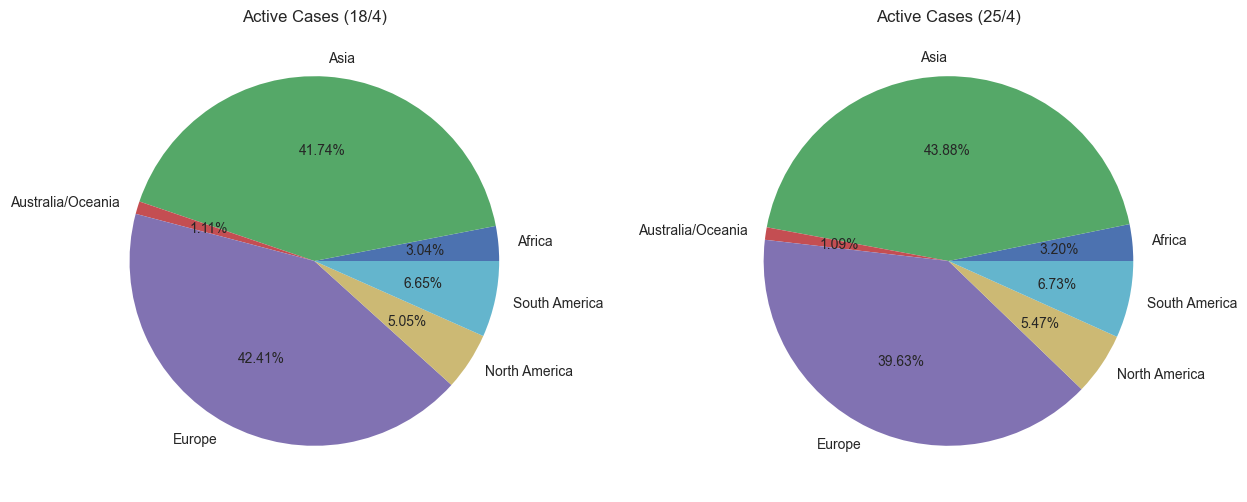

In [130]:
df = data_df.groupby('continent')[['Active Cases']].sum().rename(columns={'Active Cases': 'Active Cases (18/4)'})
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
df['Active Cases (25/4)'] = df_25.groupby('continent')[['Active Cases']].sum()['Active Cases']

ax = plt.subplot(1,2,1)
df.plot(kind='pie', y='Active Cases (18/4)', autopct='%.02f%%', figsize=(15, 6), ylabel='', legend='', ax=ax,
        title='Active Cases (18/4)')

ax = plt.subplot(1,2,2)
df.plot(kind='pie', y='Active Cases (25/4)', autopct='%.02f%%', figsize=(15, 6), ylabel='', legend='', ax=ax,
        title='Active Cases (25/4)');

Nhận xét: `Active Cases` trong 1 tuần của các châu lục tăng, trừ Europe & Australia/Oceania giảm

### d) New Deaths

In [11]:
world_df = week_df.groupby(['day'])['New Deaths'].agg(sum)
world_df = world_df.reset_index()
world_new_death_mean = world_df['New Deaths'].mean()
world_df['Status'] = world_df['New Deaths'].apply(lambda x: 'Extreme' if x > world_new_death_mean else 'Normal')
world_df.head()

,day,New Deaths,Status
0,18-04-2022,1483.0,Normal
1,19-04-2022,2461.0,Extreme
2,20-04-2022,3324.0,Extreme
3,21-04-2022,3513.0,Extreme
4,22-04-2022,2551.0,Extreme


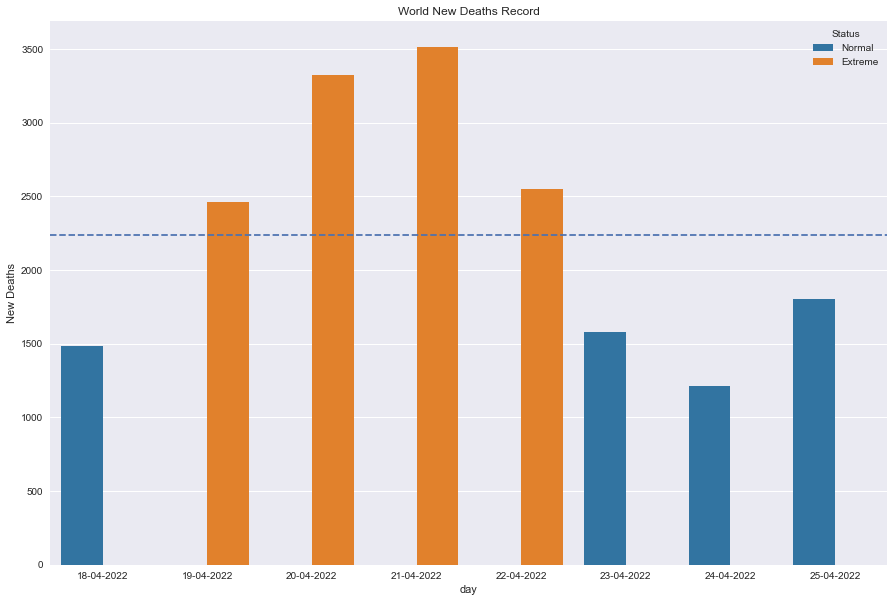

In [12]:
plt.figure(figsize=(15, 10))

sns.barplot(x='day', y='New Deaths', data=world_df, hue='Status', palette='tab10')
plt.axhline(world_new_death_mean,ls='--');
plt.title('World New Deaths Record');

Nhận xét: Trong 3 ngày 19/04/2022 $\to$ 21/04/2022, số lượng ca tử vong mới tăng nhiều hơn hẳn các ngày còn lại. Ta sẽ tiến hành xem kỹ hơn số liệu của 3 ngày này.

In [13]:
df = week_df.groupby(['continent', 'day'])['New Deaths'].agg(sum)
df = df.reset_index()
df = df[df['day'].isin(['19-04-2022', '20-04-2022', '21-04-2022'])]
df.head()

,continent,day,New Deaths
1,Africa,19-04-2022,40.0
2,Africa,20-04-2022,32.0
3,Africa,21-04-2022,71.0
9,Asia,19-04-2022,453.0
10,Asia,20-04-2022,553.0


Xét ngày 19-04-2022

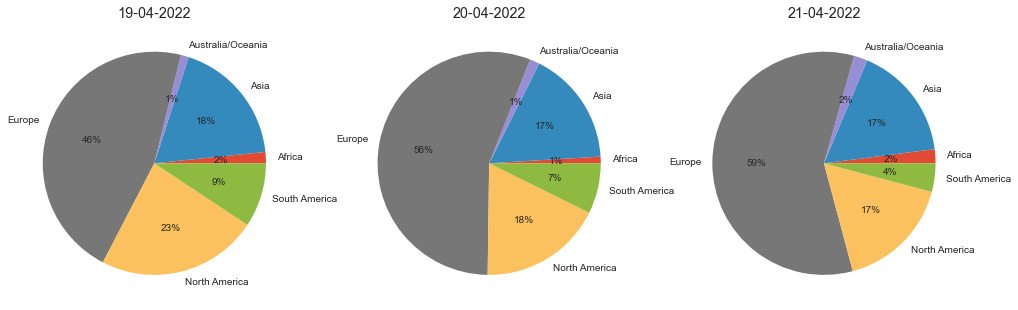

In [14]:
plt.figure(figsize=(17, 15))
plt.style.use('ggplot')

for i, d in enumerate(['19-04-2022', '20-04-2022', '21-04-2022'], 1):
    plt.subplot(1, 3, i)

    new_df = df[df['day'] == d]
    plt.pie(x=new_df['New Deaths'], labels=new_df['continent'], autopct='%.0f%%');
    plt.title(d)

Nhận xét: ....<br>

Có quan hệ nhân quả nào ở đây không?

## 2. Nhiều trường

### Total Deaths ~ Total Recovered

In [149]:
df = data_df[['Country', 'Total Recovered', 'Total Deaths']].set_index('Country')
# df.sort_values('Total Deaths', inplace=True)
df.head()

,Total Recovered,Total Deaths
Country,,
China,151407.0,4641.0
USA,80244093.0,1015821.0
India,42511701.0,521996.0
Brazil,29262483.0,662076.0
France,25132351.0,144205.0


#### Góc nhìn từ bidirectional bar chart

- Vì `Total Deaths` và `Total Recovered` là 2 thái cực trái nhau nên nhóm quyết định dùng **bidirectional bar chart** để thể hiện mối quan hệ giữa 2 trường này, với 30 nước đầu tiên được xếp theo thứ tự tăng dần của `Total Deaths`

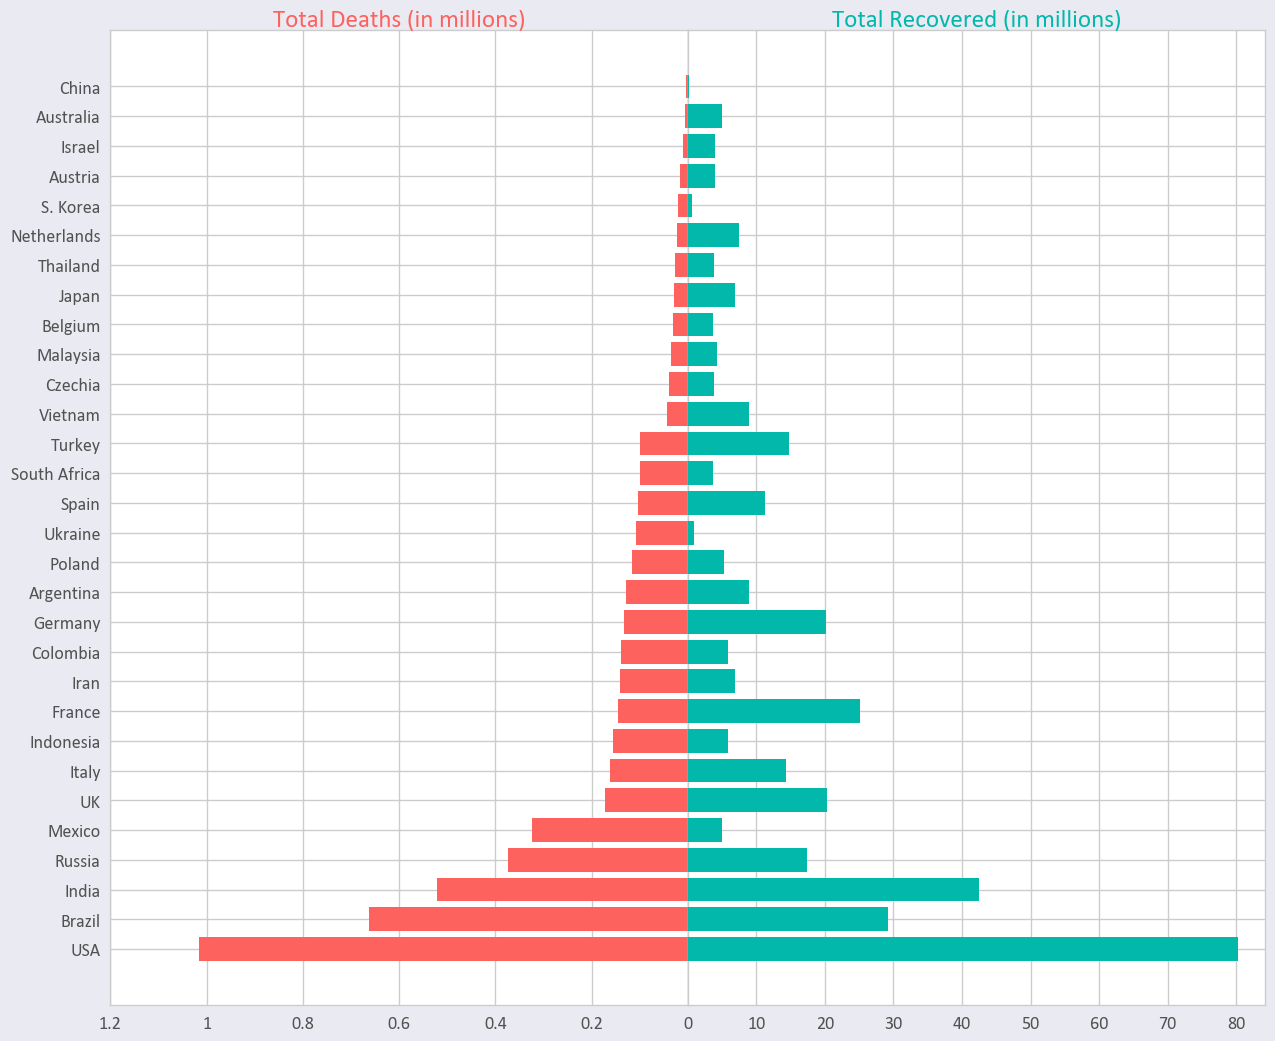

In [154]:
plt.style.use('seaborn-whitegrid') # fast
_df = df.iloc[:30].sort_values('Total Deaths')
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = _df.index
fig, axes = plt.subplots(figsize=(15,13), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout() #adjusts subplot params so that subplots are nicely fit in the figure.

axes[0].barh(index, _df['Total Deaths'], align='center', color=color_red, zorder=10)
axes[0].set_title('Total Deaths (in millions)', fontsize=18, pad=2, color=color_red, **hfont)
axes[1].barh(index, _df['Total Recovered'], align='center', color=color_blue, zorder=10)
axes[1].set_title('Total Recovered (in millions)', fontsize=18, pad=2, color=color_blue, **hfont)
axes[0].invert_xaxis()
plt.gca().invert_yaxis()

axes[0].set(yticks=index, yticklabels=index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

# thay đổi xticks labels
axes[1].set_xticks(np.array([10, 20, 30, 40, 50, 60, 70, 80])*1e6)
axes[1].yaxis.set_tick_params(size=0)
axes[1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80])

# thay đổi xticks labels
axes[0].set_xticks(axes[0].get_xticks())
axes[0].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)    

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95) #wspace=0 for no gap between the two axes

Nhận xét: Các nước được xếp theo thứ tự tăng dần `Total Deaths`. Nhìn chung `Total Deaths` tăng thì `Total Recovered` nhiều khả năng cũng tăng theo, tuy nhiên mối quan hệ này không quá mạnh (ta có thể kiểm chứng bằng biểu đồ scatter phía dưới). Ngoài ra thì tỉ lệ Recovered luôn cao gấp hơn 10 lần so với tỉ lệ Deaths (Ví dự ở nước USA thì `Total Recovered` cao gấp 80 lần so với `Total Deaths`)

#### Góc nhìn từ scatter plot

- Mục đích là để kiểm chứng lại xem mối tương quan giữa `Total Deaths` & `Total Recovered` có phải tương quan dương và nếu có thì tương quan này mạnh hay yếu

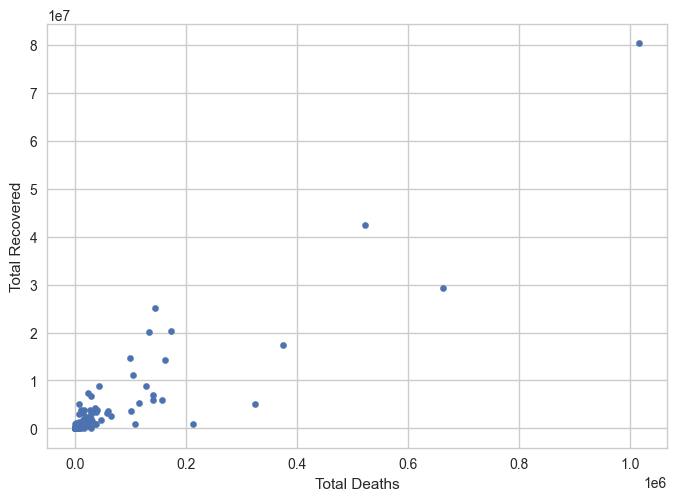

In [156]:
df.plot.scatter(x='Total Deaths', y='Total Recovered');

Nhận xét: đây là mối tương quan dương nhưng càng yếu dần khi `Total Deaths` > 0.2

### New Cases ~ New Deaths

- Xét quan hệ giữa `New Cases` và `New Deaths` bằng scatter plot

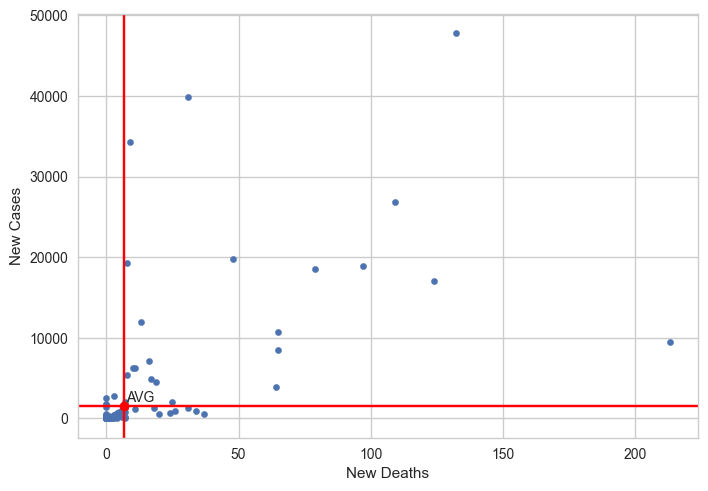

In [179]:
data_df.plot.scatter('New Deaths', 'New Cases')
x_mean, y_mean = data_df['New Deaths'].mean(), data_df['New Cases'].mean()
plt.plot(x_mean, y_mean, 'ro')
plt.axhline(y_mean, c='r')
plt.axvline(x_mean, c='r');
plt.text(x_mean + 1, y_mean + 5e2, 'AVG');

In [180]:
x_mean, y_mean

(6.561946902654867, 1574.1814159292035)

Nhận xét: đây là mối tương quan dương nhưng không mạnh. Thấy rằng lượng `New Deaths` lớn hơn trung bình khi `New Cases` đạt ít nhất khoảng 1000 ca; tuy nhiên, từ đồ thị ta thấy không phải cứ  `New Cases` > 1000 ca thì `New Deaths` trên trung bình. Tương tự, `New Cases` trên trung bình khi **đa số** `New Deaths` > 6.56

### Total Deaths ~ Total Recovered ~ Active Cases

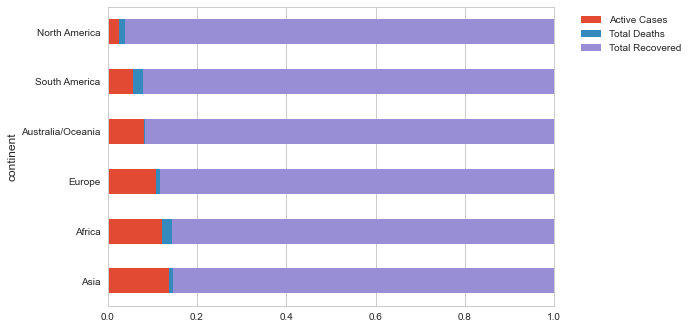

In [26]:
df = data_df.groupby('continent')[['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']].sum()
df['Active Cases'] = df['Active Cases'] / df['Total Cases']
df['Total Deaths'] = df['Total Deaths'] / df['Total Cases']
df['Total Recovered'] = df['Total Recovered'] / df['Total Cases']
df.drop(columns=['Total Cases'], inplace=True)
df.sort_values('Total Recovered').plot.barh(stacked=True);
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");
plt.xlim(0,1);

Nhận xét: `Total Cases` cấu thành từ 3 phần: `Active Cases`, `Total Deaths` (chiếm ít nhất) & `Total Recovered` (chiếm nhiều nhất)

### `Total Cases` ~ `Total Deaths` ~ `Total Recovered` ~ `Total Tests`
- Dùng radar chart có 4 góc (4 thuộc tính trên); với 5 polygon là 5 nước, lần lượt có population thuộc [0, 20%], [20, 40%],...,[80, 100%]. Mục đích để kiểm tra hypothesis: population càng lớn thì thuộc tính x càng tăng

Ref: https://github.com/empathy87/storytelling-with-data/blob/master/talks/winter_school/presentation.pdf

In [ ]:
df = data_df.copy()
df['quartile'] = pd.qcut(data_df['Population'], [0, 0.2, 0.4, 0.6, 0.8, 1],
                         labels=[5,4,3,2,1])
cnt=0
def get_median_index(df, cnt=cnt):
    if cnt==0:
        cnt+=1 # tránh Vatican là 1 nước thiếu nhiều
        return df.sample(1, random_state=19)
    return df.loc[df['Population'] == df['Population'].median()]
df = df.groupby('quartile').apply(get_median_index).reset_index(drop=True)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density,quartile
0,Palau,4190.0,0.0,6.0,0.0,3803.0,0.0,381.0,0.0,42790.0,18249.0,Australia/Oceania,39.7233,5
1,Iceland,183974.0,0.0,110.0,0.0,75685.0,0.0,108179.0,1.0,1953616.0,345217.0,Europe,3.3533,4
2,Croatia,1113547.0,30.0,15742.0,7.0,1093859.0,822.0,3946.0,23.0,4743521.0,4059850.0,Europe,71.7264,3
3,Ecuador,866925.0,41.0,35528.0,0.0,852606.0,0.0,0.0,759.0,2470170.0,18123652.0,South America,65.4288,2
4,Japan,7374251.0,39899.0,29023.0,31.0,6829906.0,44328.0,515322.0,222.0,45700624.0,125781818.0,Asia,332.2966,1


- Từ trái qua phải, từ trên xuống dưới là thứ tự tăng dần Population

In [ ]:
from plotly.subplots import make_subplots

nr, nc = 3,2
fig = make_subplots(rows=nr, cols=nc, specs=[[{'type': 'polar'}]*nc]*nr)
categories = 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Tests'
r, c = 1, 1

for i in range(df.shape[0]):
    fig.add_trace(go.Scatterpolar(r=df.iloc[i, [1, 3, 5, 9]].to_list(),
                                  theta=categories,
                                  fill='toself',
                                  name=df.iloc[i, 0]),
                  r, c)
    if c % nc == 0: 
        r += 1
        c=1
    else: c += 1
    
fig.update_layout(
    margin=dict(l=25, r=20, t=20, b=25),
    showlegend=True
)
fig.show()

- Trong trường hợp hình nhỏ khó thấy, Plotly cho phép ta tương tác trực tiếp để phóng to mỗi subplot bằng cách di chuột vào tâm, giữ và kéo ra ngoài rìa
- Nhận xét: 
    - `Total Population` ~ `Total Tests`: Dân số càng tăng, `Total Tests` cũng gần như tăng theo, trừ Ecuador dân đông nhưng `Total Tests` lại ít hơn Croatia

### `Total Cases` ~ (`Active Cases`, `Total Deaths`, `Total Recovered`)

- Ref: https://pbpython.com/waterfall-chart.html

In [ ]:
world_18 = data_df[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()
df_25 = pd.read_csv(f'Worldometer-data-preprocessed/table_25-04-2022_preprocessed.csv')
world_25 = df_25[['Total Cases', 'Active Cases', 'Total Deaths', 'Total Recovered']].sum()

df = world_18[['Total Cases']]
df = pd.concat([df,
                world_25[['Active Cases']] - world_18[['Active Cases']],
                world_25[['Total Deaths']] - world_18[['Total Deaths']],
                world_25[['Total Recovered']] - world_18[['Total Recovered']]])
df = pd.DataFrame(df, columns=['amount'])
df = pd.concat([df, 
                pd.DataFrame({'amount': [df['amount'].sum()]}).rename(index={0: 'Total Cases (25/4)'})], 
               axis=0)
df.rename({'Total Cases':'Total Cases (18/4)'}, inplace=True)
df

,amount
Total Cases (18/4),505262739.0
Active Cases,-1852229.0
Total Deaths,19760.0
Total Recovered,6517117.0
Total Cases (25/4),509947387.0


In [ ]:
text = df['amount'].apply(lambda x: str(x) if x < 0 else '+' + str(x))

fig = go.Figure(go.Waterfall(
    x = df.index,
    text=text, textposition = "outside",
    y = df['amount'][:-1].to_list() + [None],
    measure = [ "absolute","relative", "relative","relative", "total" ]   
))
fig.update_layout(
    yaxis_range=[4.95 * 1e8, 5.7 * 1e8],
    title='Total Cases progress', showlegend = True)

Nhận xét: ...

- Coi kỹ từng quan hệ giữa các cặp thuộc tính ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']


<Figure size 1080x720 with 0 Axes>

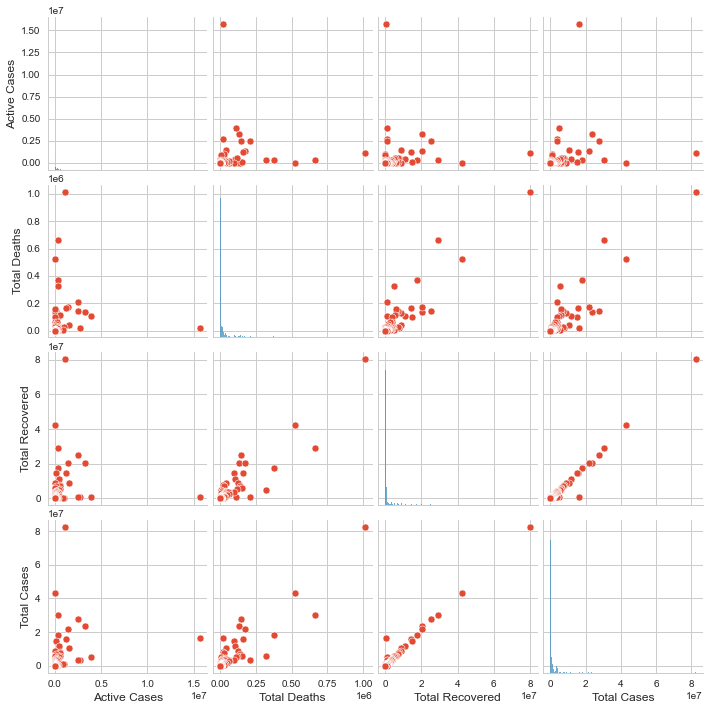

In [ ]:
plt.figure(figsize=(15,10))
cols = ['Active Cases', 'Total Deaths', 'Total Recovered', 'Total Cases']
sns.pairplot(data_df[cols],kind='scatter');

Nhận xét: `Total Recovered` & `Total Cases` có quan hệ gần như tuyến tính. Cụ thể là nếu `Total Cases` tăng/giảm thì `Total Recovered` cũng tăng/giảm, ta sẽ thử chọn ngẫu nhiên mỗi 10 nước và xây dựng biểu đồ **group bar chart** để xem thử có đúng như vậy không

#### `Total Cases` ~ `Total Recovered`

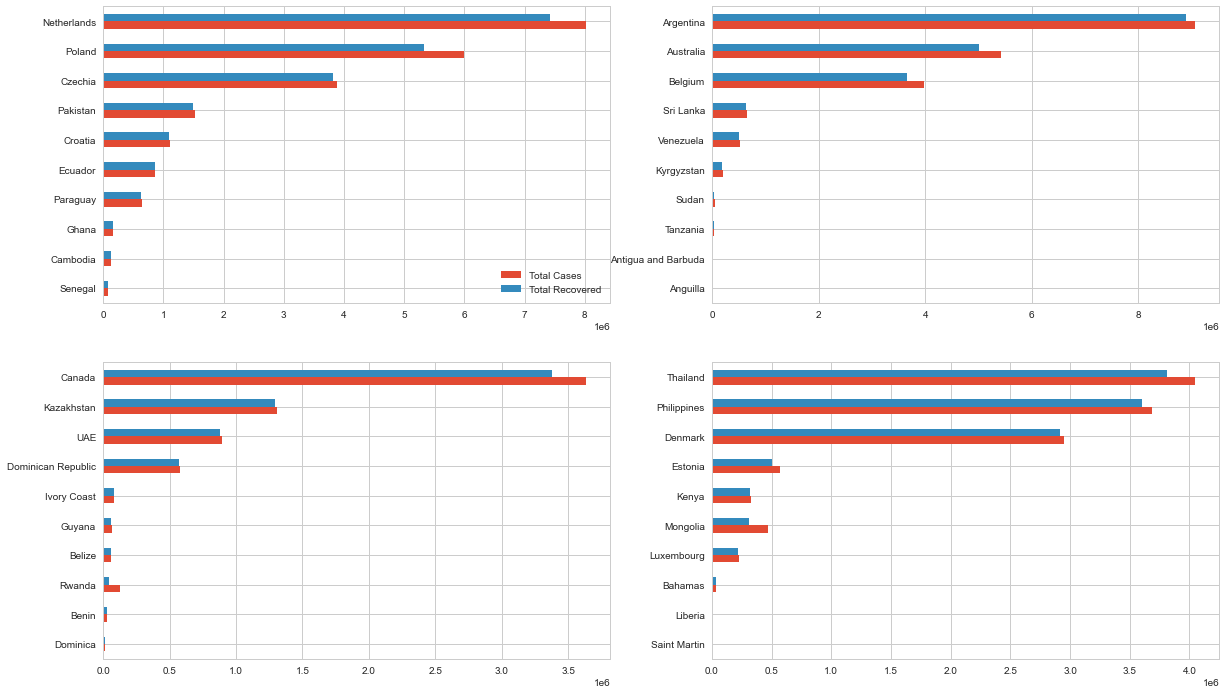

In [ ]:
df = data_df[['Country', 'Total Cases', 'Total Recovered']].set_index('Country')

for i in range(4):  
    ax = plt.subplot(2,2,i+1)
    df_10 = df.sample(10, replace=False, random_state=23+i)
    df_10.sort_values('Total Recovered').plot.barh(ax=ax, figsize=(20,12), xlabel="")
    if i > 0: ax.get_legend().remove()
    else: plt.legend(loc='lower right')
    df = df[~df.index.isin(df_10.index)]

- Mối quan hệ tuyến tính được thể hiện tương đối đúng ở hầu hết các nước, trừ 1 số nước đặc biệt thì có `Total Cases` cao hơn 1 số nước nhưng `Total Recovered` lại thấp hơn (VD: Ukraine, Tunisia, ...)

#### Active Cases & Total Recovered

In [ ]:
df = week_df.groupby(['continent', 'day'])[['Active Cases', 'Total Recovered']].sum().reset_index()
df['day'] = df['day'].apply(lambda x: x[:5])
df = df.set_index('day')
df.head()

,continent,Active Cases,Total Recovered
day,,,
18-04,Africa,1451814.0,10176379.0
19-04,Africa,1453241.0,10177682.0
20-04,Africa,1455595.0,10192494.0
21-04,Africa,1458387.0,10195115.0
22-04,Africa,1461415.0,10197204.0


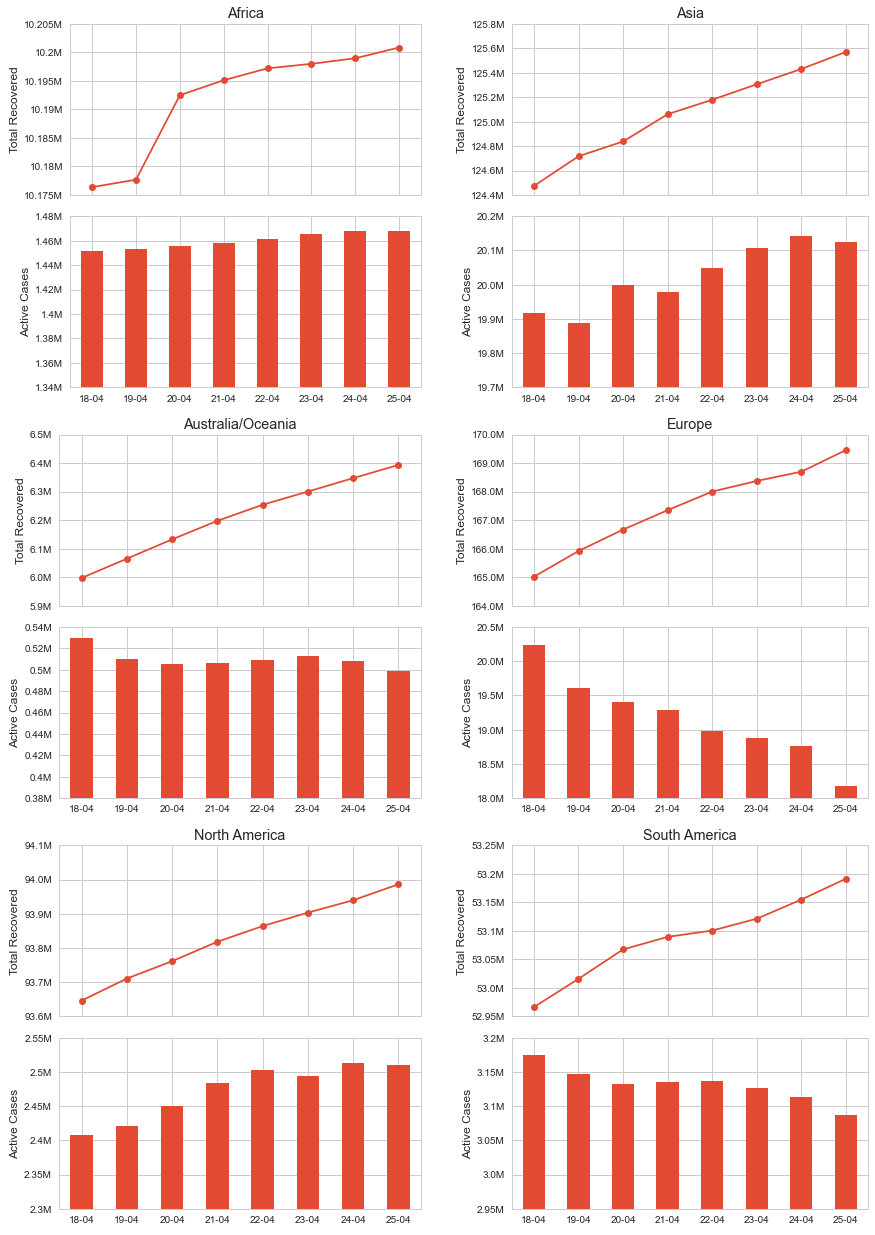

In [ ]:
nr, nc = 2, 1 # nr, nc for 1 subfigure
fig = plt.figure(constrained_layout=True, figsize=(12, 17))
subfigs = fig.subfigures(3, 2, wspace=0.07) # 6 subfig

for subfig, continent in zip(subfigs.flat, df['continent'].unique()):
    # subfig.suptitle(f'{continent}')
    axs = subfig.subplots(nr, nc, sharex=True)
    
    df_cont = df[df['continent'] == continent].drop(columns=['continent'])
    
    df_cont['Total Recovered'].plot.line(marker='o', ax=axs[0], ylabel='Total Recovered', title=continent)
    yticks = axs[0].get_yticks()
    trunc_labels = [f'{round(y/1e6,3)}M' for y in yticks]
    axs[0].set_yticks(yticks)
    axs[0].set_yticklabels(trunc_labels)

    df_cont[['Active Cases']].plot.bar(ax=axs[1], legend='', rot=0, xlabel='', ylabel='Active Cases')
    axs[1].set_ylim(df_cont['Active Cases'].min() - 100000, df_cont['Active Cases'].max())
    yticks = axs[1].get_yticks()
    trunc_labels = [f'{round(y/1e6,3)}M' for y in yticks]
    axs[1].set_yticks(yticks)
    axs[1].set_yticklabels(trunc_labels);

Nhận xét: ...

### `New Deaths` & các cột còn lại
Tìm mối liên hệ giữa `New Deaths` và các thuộc tính khác có trong `data_df`.<br>
Chúng ta chỉ xét trên châu lục **Europe**

In [ ]:
df = week_df[week_df['continent'] == 'Europe'].groupby('day')[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases', 'Serious']].sum()
df = df.reset_index()
df.head()

,day,New Cases,New Deaths,New Recovered,Active Cases,Serious
0,18-04-2022,120322.0,693.0,730283.0,20236336.0,9212.0
1,19-04-2022,267488.0,1137.0,891529.0,19607425.0,9203.0
2,20-04-2022,518969.0,1854.0,742427.0,19406118.0,9151.0
3,21-04-2022,479519.0,2056.0,661646.0,19280309.0,9236.0
4,22-04-2022,350697.0,1324.0,644939.0,18979043.0,9170.0


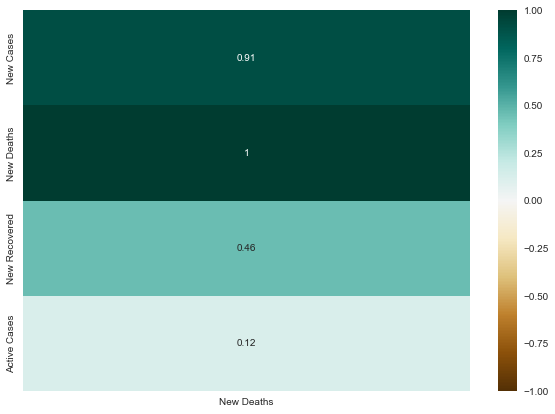

In [ ]:
corrs = df[['New Cases', 'New Deaths', 'New Recovered', 'Active Cases']].corr()[['New Deaths']]

plt.figure(figsize=(10, 7))
sns.heatmap(data=corrs, cmap='BrBG', annot=True, vmax=1, vmin=-1);

Nhận xét: Ta thấy rằng giữa `New Cases` và `New Deaths` có tương quan nhiều với nhau. Xem xét trên góc nhìn hơn giữa cặp thuộc tính này:

- Scatter plot

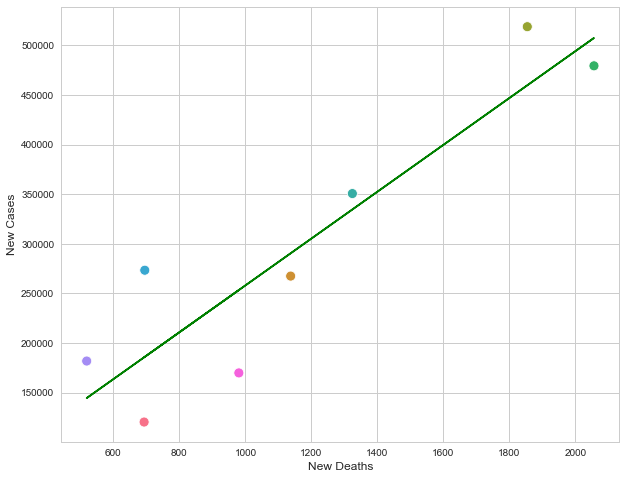

In [ ]:
dc_df = df[['New Cases', 'New Deaths', 'day']]
plt.figure(figsize=(10, 8))
sns.scatterplot(x='New Deaths', y='New Cases', hue='day', data=dc_df, legend=False, s=100);
x = dc_df['New Deaths'].values
y = dc_df['New Cases'].values

m, b = np.polyfit(x, y, 1)

plt.plot(x, x*m + b, c='green');

Nhận xét: ...

## 3. Quan hệ nhân quả

- Xét tính tương quan của các cột


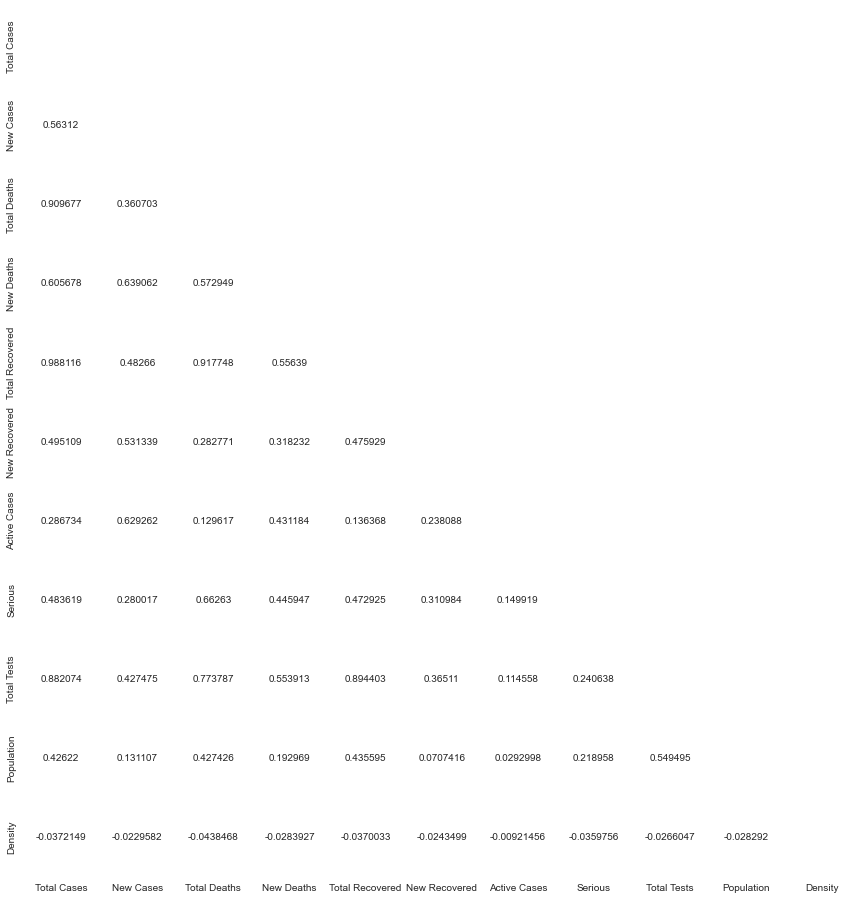

In [24]:
corr = data_df.corr()
matrix = np.triu(corr)

plt.subplots(figsize=(15,16))

with sns.axes_style('white'):
    sns.heatmap(corr, mask=matrix,
                cbar=False,
                square=False,
                annot=True,
                fmt='g',
                cmap=ListedColormap(['white']),
                linewidths=0.5)

Nhận xét: có thể thấy gần như các trường dữ liệu đều tỉ lệ thuận với nhau. Trường dữ liệu `Total Cases` ảnh hưởng rõ ràng nhất đối với các trường dữ liệu khác. Các cặp trường dữ liệu có ảnh hưởng lẫn nhau nổi bật nhất là: (`Total Cases`, `Total Tests`), (`Total Cases`, `Total Recovered`), (`Total Cases`, `Total Deaths`), (`Total Deaths`, `Total Recovered`), (`Total Recovered`, `Total Tests`)

In [53]:
### 1. ['Total Recovered', 'Serious'] -> 'Total Tests': 84.3
import statsmodels.api as sm

independent = ['Total Recovered', 'Serious']
dependent = 'Total Tests'

X = data_df[independent].to_numpy()
y = data_df[dependent].to_numpy()
mod = sm.OLS(y, sm.add_constant(X)).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     597.7
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.56e-90
Time:                        17:33:36   Log-Likelihood:                -4281.1
No. Observations:                 226   AIC:                             8568.
Df Residuals:                     223   BIC:                             8578.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.446e+06   2.86e+06      1.552      0.1

### Khảo sát mối quan hệ nhân quả [`Total Recovered`, `Serious`] -> `Total Tests`

In [92]:
X = data_df[independent].to_numpy()
y = data_df[dependent].to_numpy()
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_ 

(4446490.750364624, array([ 1.46945912e+01, -3.33625024e+04]))

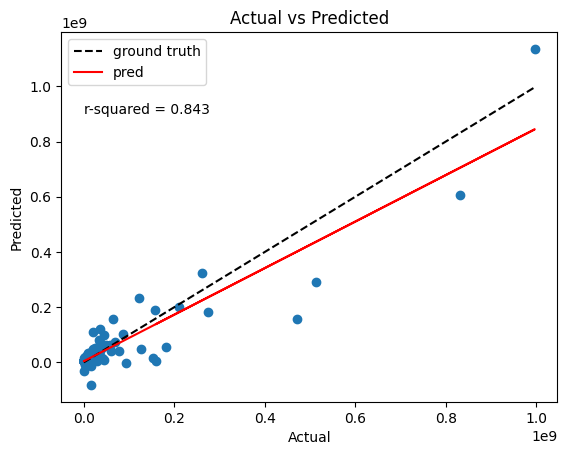

In [102]:
y_pred = reg.predict(X)
r_squared = r2_score(y, y_pred)

fig, ax = plt.subplots()
plt.scatter(y, y_pred)
line1, = ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='ground truth')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted')
#regression line
y_test, y_predicted = y.reshape(-1,1), y_pred.reshape(-1,1)
line2, = ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test), color='r', label='pred')
ax.annotate("r-squared = {:.3f}".format(r2_score(y_test, y_predicted)), (0, 0.9*1e9));
ax.legend(handles=[line1, line2]);

Nhận xét: 

### Khảo sát mối quan hệ nhân quả giữa 2 cột (`Total Cases`, `Total Recovered`)

- "**There is a causal relationship between two variables if a change in the level of one variable causes a change in the other variable**" $\to$ Ta sẽ kiểm tra mối quan hệ này trong nhiều ngày liền

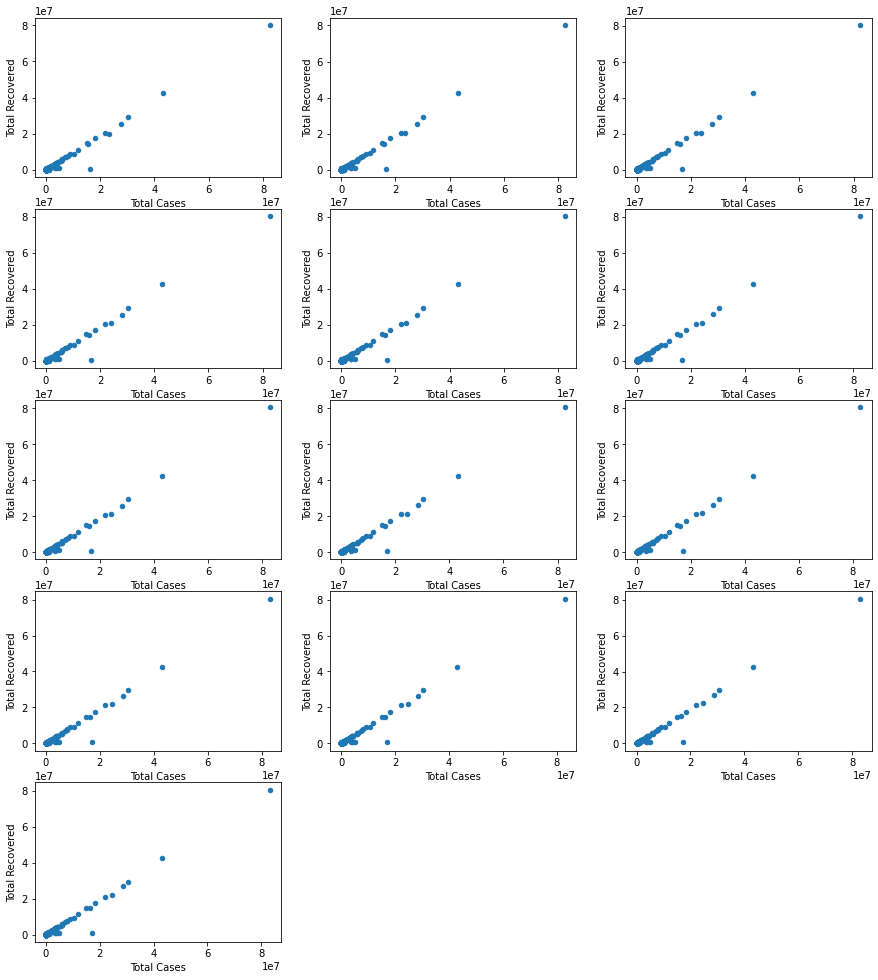

In [ ]:
import preprocess_pipeline as pp 

l, r = datetime.strptime('18-04-2022', '%d-%m-%Y'), datetime.strptime('30-04-2022', '%d-%m-%Y')
lst = [file for file in os.listdir('Worldometer-data') if 
       datetime.strptime(file.split('_')[1], '%d-%m-%Y') >= l and
       datetime.strptime(file.split('_')[1], '%d-%m-%Y') <= r]
nc = 3
nr = int(np.ceil(len(lst) / nc))
plt.figure(figsize=(15, 17))

for i, file in enumerate(lst, 1):
    ax = plt.subplot(nr, nc, i)
    df = pp.preprocess_pipeline(file.split('_')[1])
    df.plot.scatter(x = 'Total Cases', y='Total Recovered', ax=ax)
#     break

- Linear model: khi `Total Cases` tăng 1 đơn vị thì `Total Recovered` tăng/giảm thế nào

In [ ]:
X = data_df['Total Cases'].to_numpy().reshape(-1,1)
y = data_df['Total Recovered'].to_numpy()
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_ 

(-108094.24316907744, array([0.94348789]))

$\to$ Như vậy nếu coi `Total Recovered` là biến phụ thuộc và `Total Cases` là biến độc lập thì mối quan hệ giữa chúng được biểu diễn theo đường thẳng:
            
            Total Recovered = -108094.24316907744 + 0.94348789*Total Cases

- Ta sẽ vẽ đường hồi quy và tính giá trị r-squared

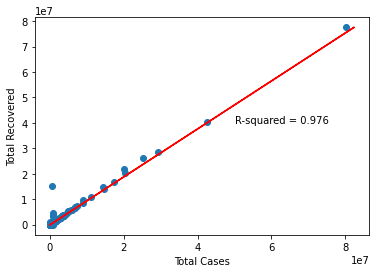

In [ ]:
y_pred = reg.predict(X)
r_squared = r2_score(y, y_pred)

plt.scatter(y, y_pred)
plt.plot(X, y_pred, color='red')
plt.gca().set_xlabel('Total Cases')
plt.gca().set_ylabel('Total Recovered')
plt.text(5 * 1e7, 4 * 1e7, 'R-squared = %0.3f' % r_squared);

$\to$ Mô hình giải thích được 97.6% dữ liệu, chứng tỏ biến `Total Cases` giải thích được **phần lớn** xu hướng của biến `Total Recovered`

### Khảo sát mối quan hệ nhân quả giữa `New Deaths` & `New Cases`

- Xét dữ liệu từ ngày 18-30/4/2022

In [29]:
df_world_time = pd.DataFrame()

for d in range(18, 30, 1):
    day = f'{d}-04-2022'
    df_temp = pd.read_csv(f'./Worldometer-data/table_{day}_raw.csv').drop(columns='Unnamed: 0')

    df = df_temp[df_temp['Country, Other'] == 'World']
    df['day'] = day
    df_world_time = pd.concat([df_world_time, df], axis=0)

# print(df_world_time.shape)

df_world_time = df_world_time[['Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical','day']]

df_world_time[['New Cases', 'New Deaths', 'New Recovered']] = df_world_time[['New Cases', 'New Deaths', 'New Recovered']].applymap( \
                                              lambda x: x if x != x else float(x[1:].replace(',', '')))

cols = list(df_world_time)
num_cols = list(set(cols).difference(set(['New Cases', 'New Deaths', 'New Recovered', 'Country','day'])))
df_world_time[num_cols] = df_world_time[num_cols].applymap(lambda x: x if x != x else float(x.replace(',', '')))
df_world_time['day'] = pd.to_datetime(df_world_time['day'])#,format= '%d-%m-%y')
df_world_time.head()

C:\Users\Admin\AppData\Local\Temp/ipykernel_15144/4202299984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = day


,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",day
0,505263460.0,355765.0,6225557.0,1483.0,456606790.0,1014825.0,42431113.0,42014.0,2022-04-18
0,505899236.0,609820.0,6228605.0,2461.0,457920830.0,1314122.0,41749801.0,41934.0,2022-04-19
0,506882550.0,918218.0,6232833.0,3324.0,458967501.0,1041435.0,41682216.0,41786.0,2022-04-20
0,507828679.0,854280.0,6237649.0,3513.0,460009625.0,1017074.0,41581405.0,41814.0,2022-04-21
0,508509728.0,681049.0,6240200.0,2551.0,460886526.0,876901.0,41383002.0,41727.0,2022-04-22


C:\Users\Admin\AppData\Local\Temp/ipykernel_15144/2144719139.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_world_time['day'],rotation=0)


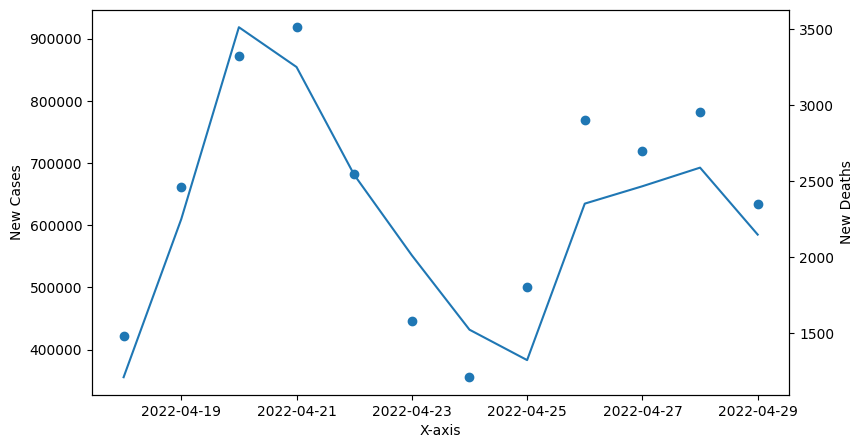

In [38]:
plt.style.use('default')
fig, ax1 = plt.subplots(figsize=(9,5)) 
  
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('New Cases') 
plot_1 = ax1.plot(df_world_time['day'], df_world_time['New Cases'])
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(df_world_time['day'],rotation=0)

ax2 = ax1.twinx() 

ax2.set_ylabel('New Deaths') 
plot_2 = ax2.plot(df_world_time['day'],df_world_time['New Deaths'],'o')

plt.show()

Có thể thấy dường như số ca nhiễm mới tăng thì số ca tử vong cũng tăng, còn những ngày số ca nhiễm mới giảm thì số ca tử vong cũng giảm theo, đây là nhìn chung số liệu của thế giới, vậy còn với các nước thì sao?

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New Cases', ylabel='New Deaths'>

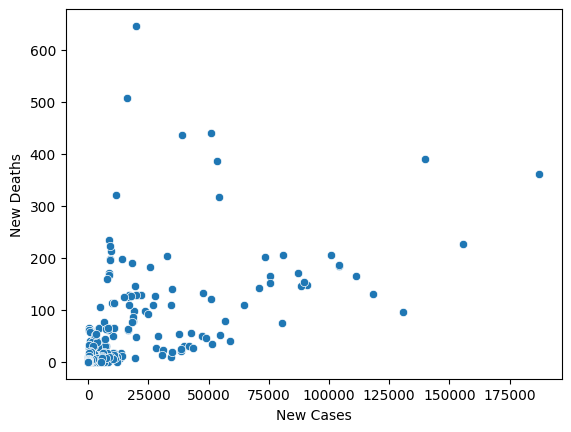

In [39]:
sns.scatterplot(week_df['New Cases'], week_df['New Deaths'])

Khi nhìn vào tương quan giữa ca nhiễm mới và ca tử vong mới của các nước trong vòng 1 tuần thì có vẻ như là số ca nhiếm mới càng cao thì số ca tử vong mơi cũng có xu hướng tăng, nhưng không phải là chính xác hoàn toàn, vậy còn yếu tố nào ảnh hưởng đến số ca tử vong mới?

C:\Users\Admin\AppData\Local\Temp/ipykernel_15144/2434733577.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_world_time['day'],rotation=45)


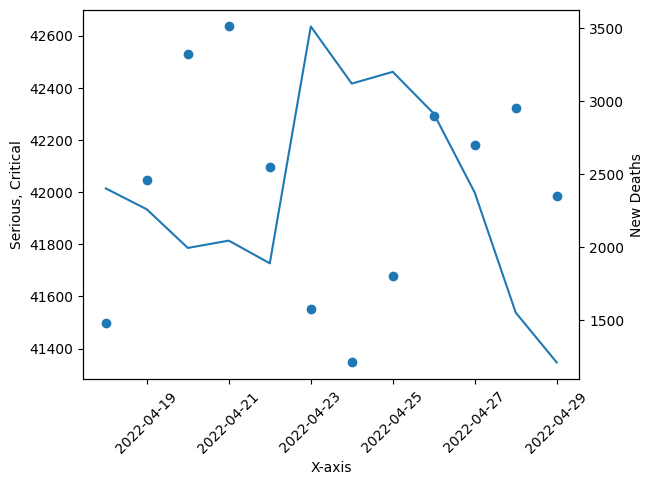

In [40]:
fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Serious, Critical') 
plot_1 = ax1.plot(df_world_time['day'], df_world_time['Serious, Critical'])
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(df_world_time['day'],rotation=45)

ax2 = ax1.twinx() 

  
ax2.set_ylabel('New Deaths') 
plot_2 = ax2.plot(df_world_time['day'],df_world_time['New Deaths'],'o')

plt.show()

Nhìn có vẻ như là New Deaths diễn biến chậm hơn Serious, Critical vài ngày. Có thể đúng bởi vì một người trong giai đoạn nguy hiểm chưa thể tử vong ngay được. Nhưng số liệu chưa đủ để có thể cho cái nhìn chính xác hơn


- Tạo cột TotalDeaths/TotalCases để có thể nhìn chung được tỉ lệ tử vong của các nước, qua đó một phần nào có thể đánh giá chất lượng y tế của các nước

In [41]:
data_df_temp = data_df.copy()
data_df_temp['TotalDeaths/TotalCases'] = data_df_temp['Total Deaths'] / data_df_temp['Total Cases'] 
data_df_temp['Predict New Deaths'] = data_df_temp['TotalDeaths/TotalCases'] * data_df_temp['New Cases']
data_df_temp.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious,Total Tests,Population,continent,Density,TotalDeaths/TotalCases,Predict New Deaths
0,China,185035.0,2742.0,4641.0,3.0,151407.0,1637.0,28987.0,71.0,160000000.0,1.439324e+09,Asia,149.2199,0.025082,68.774135
1,USA,82383494.0,26881.0,1015821.0,109.0,80244093.0,41383.0,1123580.0,1438.0,996639125.0,3.344853e+08,North America,36.0000,0.012330,331.453341
2,India,43045527.0,1247.0,521996.0,31.0,42511701.0,928.0,11830.0,698.0,832104846.0,1.404347e+09,Asia,427.8611,0.012127,15.121873
3,Brazil,30261088.0,8470.0,662076.0,65.0,29262483.0,35432.0,336529.0,8318.0,63776166.0,2.152705e+08,South America,25.2888,0.021879,185.313354
4,France,27790834.0,19810.0,144205.0,48.0,25132351.0,217445.0,2514278.0,1541.0,260504402.0,6.553266e+07,Europe,118.8782,0.005189,102.792923


C:\Users\Admin\AppData\Local\Temp/ipykernel_15144/3800946579.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_df_temp_1['Country'],rotation=90)


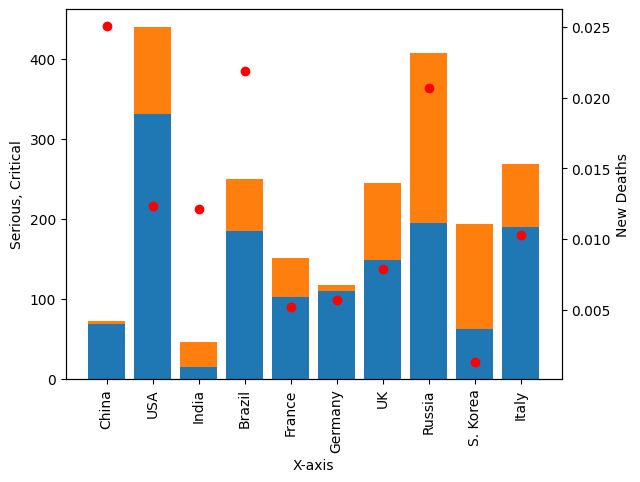

In [42]:
data_df_temp_1 = data_df_temp.head(10)

fig, ax1 = plt.subplots() 
ax1.set_xlabel('X-axis') 
ax1.set_ylabel('Serious, Critical') 
plot_1 = ax1.bar(data_df_temp_1['Country'],data_df_temp_1['Predict New Deaths'],label ='PD')
plot_2 = ax1.bar(data_df_temp_1['Country'],data_df_temp_1['New Deaths'],bottom= data_df_temp_1['Predict New Deaths'])
ax1.tick_params(axis ='y', labelcolor = 'black') 
ax1.set_xticklabels(data_df_temp_1['Country'],rotation=90)

ax2 = ax1.twinx() 
ax2.set_ylabel('New Deaths') 
plot_2 = ax2.plot(data_df_temp_1['Country'],data_df_temp_1['TotalDeaths/TotalCases'],'ro')
plt.show()

Không thể thông qua tỉ lệ tử vong của các nước mà dự đoán số người tử vong theo ca mắc mới được, có thể do mỗi giai đoạn thì số ca nhiễm và tỉ lệ tử vong khác nhau, tùy chủng loại virus mà cho lại kết quả khác nhau theo thời gian

=> Vậy chỉ có thể nói là sự thay đổi của số ca mắc mới có ảnh hưởng tới số ca tử vong mới thông qua một phần là số ca nghiêm trọng. Ngoài ra nó cũng không phải là nhân tố duy nhất ảnh hưởng đến số ca tử vong mới mà còn phụ thuộc vào nhiều yếu tố bên ngoài khác mà số liệu chưa chỉ rõ được.